# Voice Recognition

## Exploration about Audio Augmentaion

### Library

In [1]:
#Library
import pandas as pd
import numpy as np
from datasets import load_dataset, Audio, DatasetDict, concatenate_datasets
import seaborn as sns
import matplotlib.pyplot as plt
import os
import librosa
from IPython.display import Audio
#!pip install librosa soundfile (if not installed)

c:\Users\shining\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### File Path

In [2]:
def load_audio_data(csv_file, audio_base_path):
    """
    Load audio data from a CSV file and return a DataFrame with additional audio data.
    """
    df = pd.read_csv(csv_file)
    
    # Add a column for audio data
    df['audio_data'] = df['filepath'].apply(lambda x: load_audio(os.path.join(audio_base_path, x)))
    
    return df

def load_audio(file_path):
    """
    Load an audio file and return the audio data and sample rate.
    """
    data, sr = librosa.load(file_path, sr=None)
    return data, sr

def play_audio(data, sr):
    return Audio(data, rate=sr)

In [3]:
#Load Audio File and CSV File
csv_file = "F:\AI Portfolio Project\Project-3\datasets_split\\minds_traindf.csv"
audio_base_path = "F:\\AI Portfolio Project\\Project-3\\datasets\\MInDS-14\\audio"
df = load_audio_data(csv_file, audio_base_path)

### Make a waveplot and spectogram

In [4]:
#This 2 Lines for creating waveplot and spectogram
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} intent'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} intent'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

### Augmentation Settings

In [5]:
#Setting the augmentaion
def augment_audio(data, sr):
    # Time stretching
    data = librosa.effects.time_stretch(data, rate=1.1)
    
    # Pitch shifting
    data = librosa.effects.pitch_shift(data, sr=sr, n_steps=2)
    
    # Adding noise
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    noise = noise_amp * np.random.normal(size=data.shape[0])
    data = data + noise
    
    # Shifting
    shift_range = np.random.randint(-5 * sr // 1000, 5 * sr // 1000)
    data = np.roll(data, shift_range)
    
    # Volume control
    data = data * 1.1
    
    return data

In [6]:
#For preprocessing the audio
def preprocess_audio(data, sr):
    # Normalization
    data = librosa.util.normalize(data)
    # Pre-emphasis
    data = librosa.effects.preemphasis(data)
    # Resampling
    data = librosa.resample(data, orig_sr=sr, target_sr=16000)
    # Trimming silence
    data, _ = librosa.effects.trim(data)
    return data

### Checking Before and After Augmentation

Intent: FREEZE
Original Data:


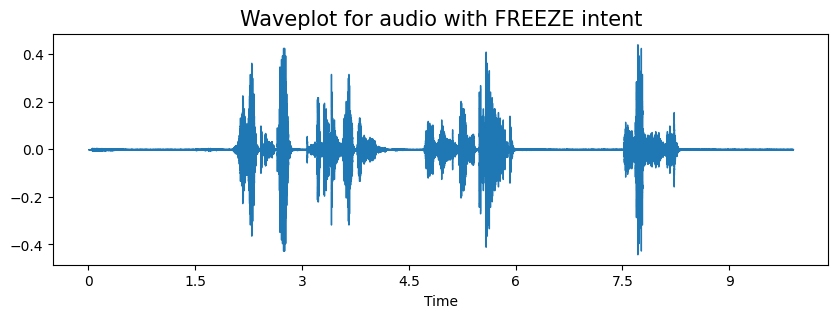

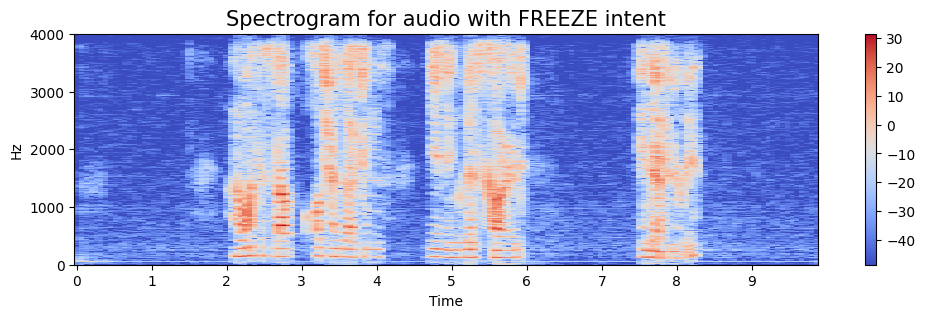

Preprocessed Data:


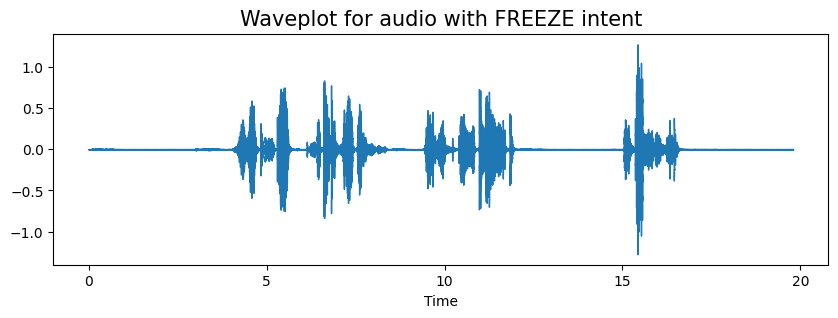

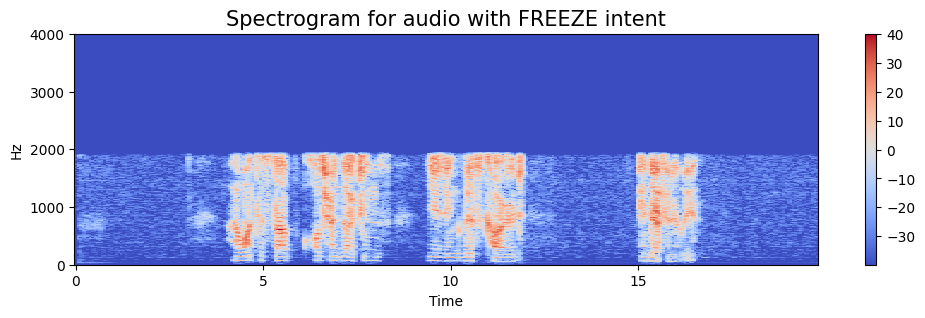

Augmented Data:


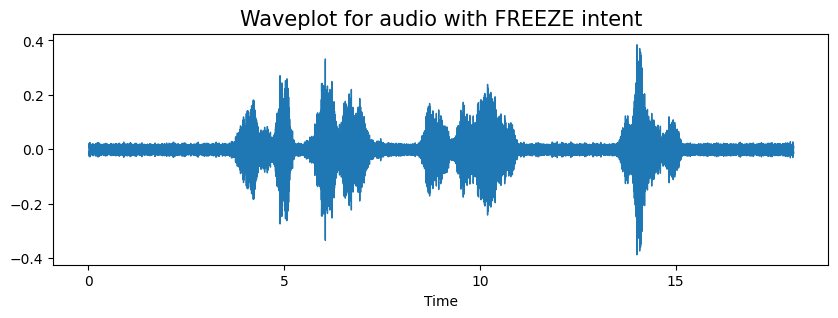

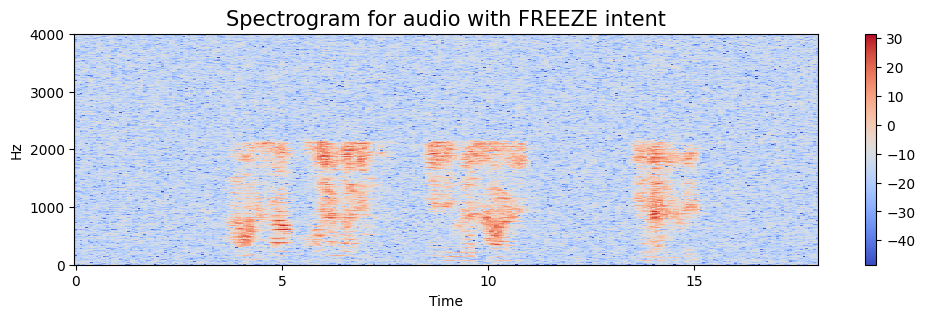

Intent: FREEZE
Original Data:


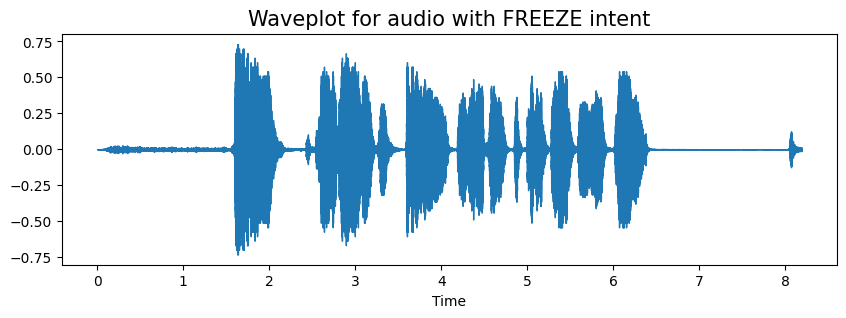

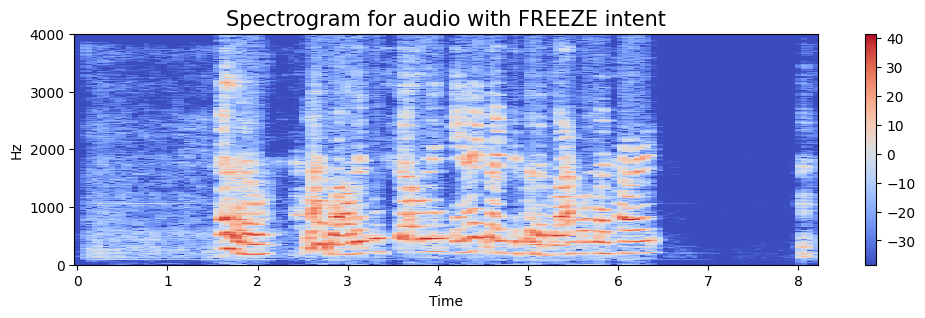

Preprocessed Data:


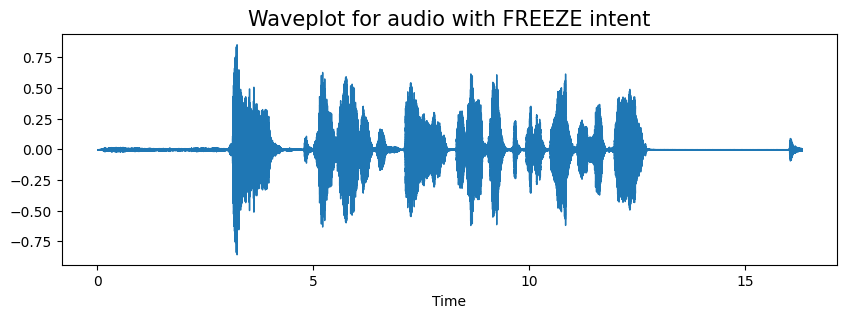

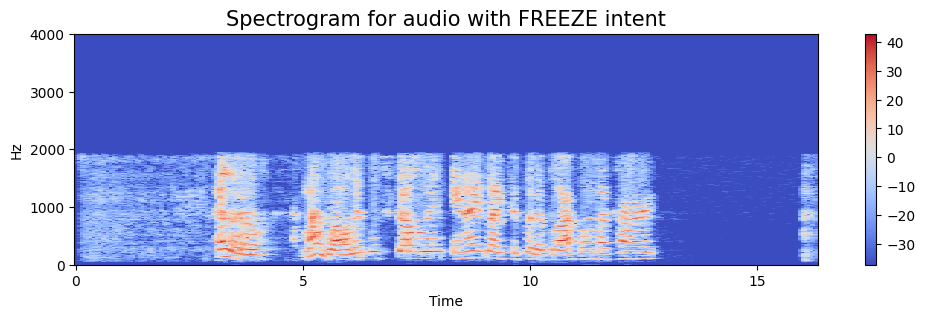

Augmented Data:


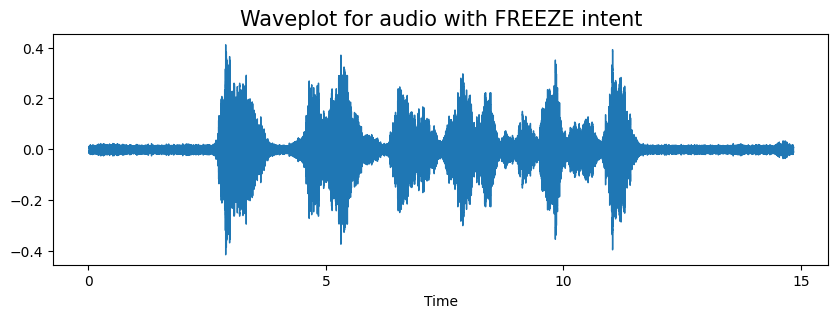

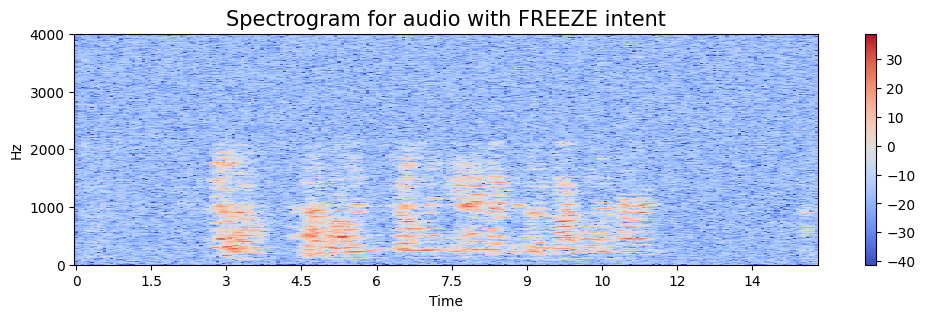

Intent: ABROAD
Original Data:


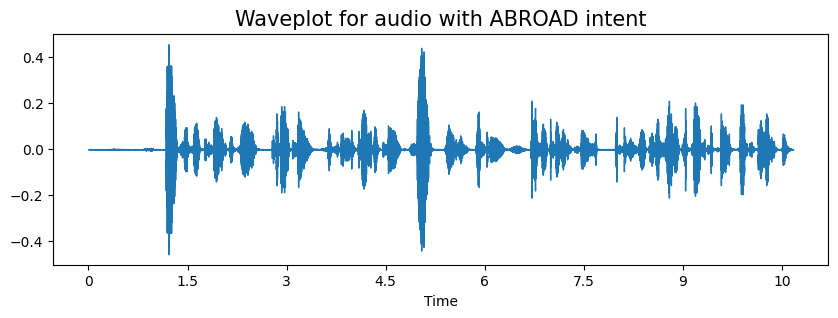

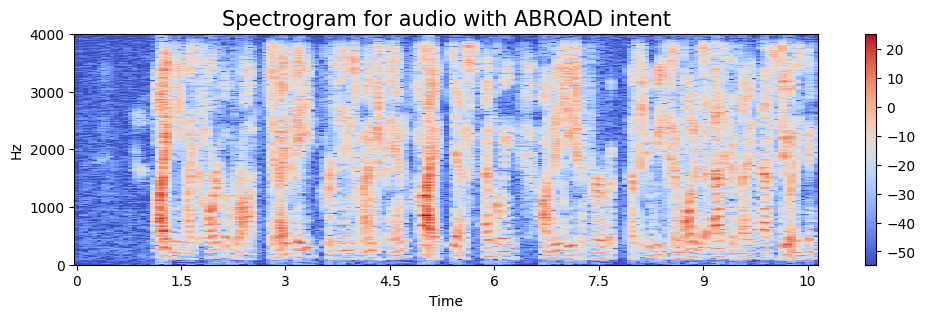

Preprocessed Data:


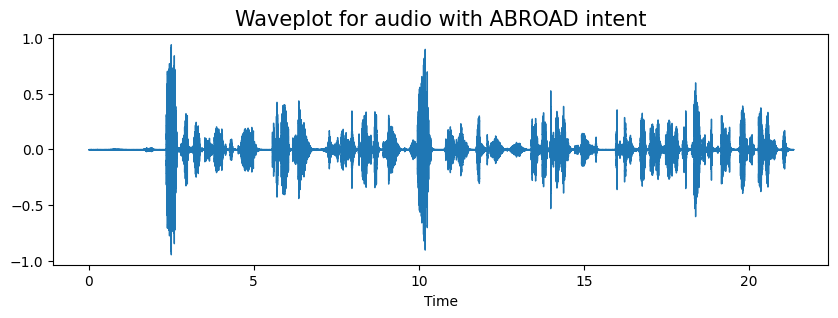

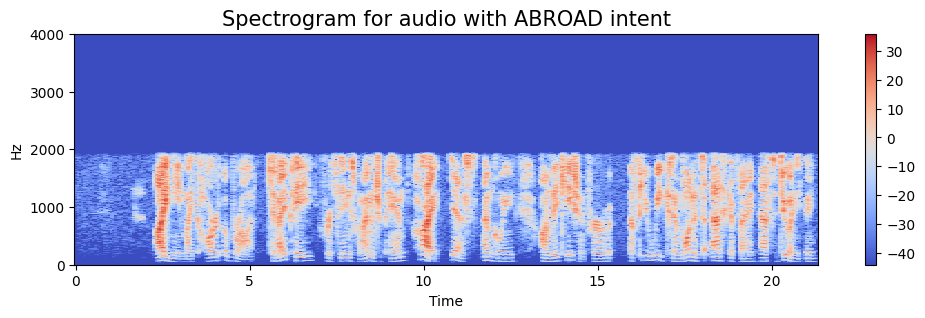

Augmented Data:


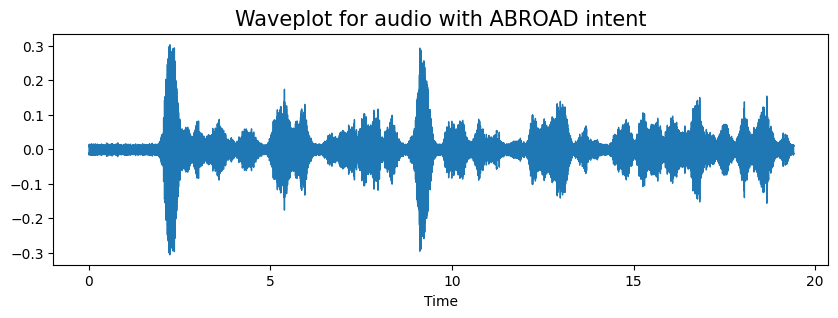

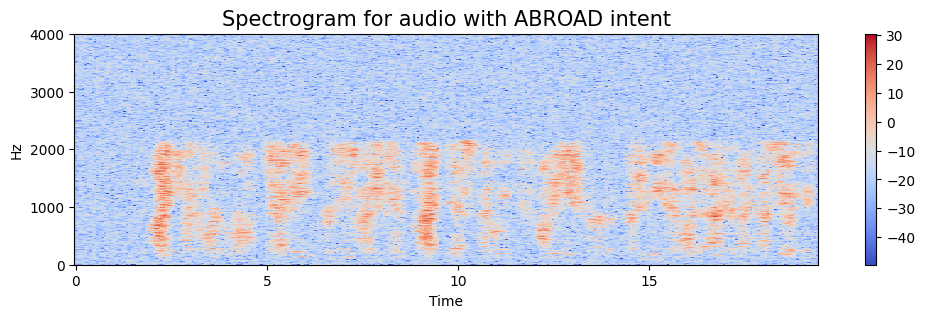

In [8]:
for index, row in df.head(3).iterrows():
    data, sr = row['audio_data']
    # Preprocess and augment the audio data
    preprocessed_data = preprocess_audio(data, sr)
    augmented_data = augment_audio(preprocessed_data, sr)
    
    print(f"Intent: {row['intent']}")
    
    # Visualize original data
    print("Original Data:")
    create_waveplot(data, sr, row['intent'])
    create_spectrogram(data, sr, row['intent'])
    display(play_audio(data, sr))
    
    # Visualize preprocessed data
    print("Preprocessed Data:")
    create_waveplot(preprocessed_data, sr, row['intent'])
    create_spectrogram(preprocessed_data, sr, row['intent'])
    display(play_audio(preprocessed_data, sr))
    
    # Visualize augmented data
    print("Augmented Data:")
    create_waveplot(augmented_data, sr, row['intent'])
    create_spectrogram(augmented_data, sr, row['intent'])
    display(play_audio(augmented_data, sr))